Breezy Hofmeister

In [18]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set option to display all columns
pd.set_option('display.max_columns', None)


##Introduction
The goal of this project is very simple. Can I breakdown a large dataset on Major League Soccer(MLS) into actionable insights? In this scenario I am going to see if there is a significant home field advantage in MLS. I will be using basic statistical methods to complete this, and I hope you find it insightful!

Data sourced from:https://www.kaggle.com/datasets/josephvm/major-league-soccer-dataset

##Preparing the Data

In [19]:
#2025 MLS match data from 1996-2020
url = "https://raw.githubusercontent.com/bhofmeister0304/team-performance-analysis/refs/heads/main/data/raw/matches.csv"

df_matches = pd.read_csv(url)

df_matches.head()

# Data sourced from: https://www.kaggle.com/datasets/josephvm/major-league-soccer-dataset



/tmp/ipython-input-3881233313.py:4: DtypeWarning: Columns (11,14,50,102,123,125,129,131,133,135,137,139,141,143,145,147,149,157,158,160,161,163,165,167,169,171,173,184,186,187,205,206) have mixed types. Specify dtype option on import or set low_memory=False.
  df_matches = pd.read_csv(url)


,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,game_status,shootout,home_score,away_score,referee,home_goal_minutes,home_goal_scorers,away_goal_minutes,away_goal_scorers,home_starting_1_num,home_starting_1,home_starting_2_num,home_starting_2,home_starting_3_num,home_starting_3,home_starting_4_num,home_starting_4,home_starting_5_num,home_starting_5,home_starting_6_num,home_starting_6,home_starting_7_num,home_starting_7,home_starting_8_num,home_starting_8,home_starting_9_num,home_starting_9,home_starting_10_num,home_starting_10,home_starting_11_num,home_starting_11,home_bench_1_num,home_bench_1,home_bench_1_minute,home_bench_2_num,home_bench_2,home_bench_2_minute,home_bench_3_num,home_bench_3,home_bench_3_minute,home_bench_4_num,home_bench_4,home_bench_4_minute,home_bench_5_num,home_bench_5,home_bench_5_minute,home_bench_6_num,home_bench_6,home_bench_6_minute,home_bench_7_num,home_bench_7,home_bench_7_minute,home_bench_8_num,home_bench_8,home_bench_8_minute,home_bench_9_num,home_bench_9,home_bench_9_minute,away_starting_1_num,away_starting_1,away_starting_2_num,away_starting_2,away_starting_3_num,away_starting_3,away_starting_4_num,away_starting_4,away_starting_5_num,away_starting_5,away_starting_6_num,away_starting_6,away_starting_7_num,away_starting_7,away_starting_8_num,away_starting_8,away_starting_9_num,away_starting_9,away_starting_10_num,away_starting_10,away_starting_11_num,away_starting_11,away_bench_1_num,away_bench_1,away_bench_1_minute,away_bench_2_num,away_bench_2,away_bench_2_minute,away_bench_3_num,away_bench_3,away_bench_3_minute,away_bench_4_num,away_bench_4,away_bench_4_minute,away_bench_5_num,away_bench_5,away_bench_5_minute,away_bench_6_num,away_bench_6,away_bench_6_minute,away_bench_7_num,away_bench_7,away_bench_7_minute,away_bench_8_num,away_bench_8,away_bench_8_minute,away_bench_9_num,away_bench_9,away_bench_9_minute,home_bench_10_num,home_bench_10,home_bench_10_minute,home_starting_12_num,home_starting_12,home_starting_13_num,home_starting_13,home_starting_14_num,home_starting_14,away_starting_12_num,away_starting_12,away_starting_13_num,away_starting_13,away_starting_14_num,away_starting_14,away_starting_15_num,away_starting_15,home_starting_15_num,home_starting_15,home_starting_16_num,home_starting_16,home_starting_17_num,home_starting_17,home_starting_18_num,home_starting_18,home_starting_19_num,home_starting_19,home_starting_20_num,home_starting_20,home_starting_21_num,home_starting_21,home_starting_22_num,home_starting_22,home_bench_11_num,home_bench_11,home_bench_11_minute,home_bench_12_num,home_bench_12,home_bench_12_minute,home_bench_13_num,home_bench_13,home_bench_13_minute,home_bench_14_num,home_bench_14,home_bench_14_minute,away_starting_16_num,away_starting_16,away_starting_17_num,away_starting_17,away_starting_18_num,away_starting_18,away_starting_19_num,away_starting_19,away_starting_20_num,away_starting_20,away_starting_21_num,away_starting_21,away_bench_10_num,away_bench_10,away_bench_10_minute,away_bench_11_num,away_bench_11,away_bench_11_minute,away_bench_12_num,away_bench_12,away_bench_12_minute,away_starting_22_num,away_starting_22,away_bench_13_num,away_bench_13,away_bench_13_minute,home_possessionPct,away_possessionPct,home_shotsSummary,away_shotsSummary,home_foulsCommitted,away_foulsCommitted,home_yellowCards,away_yellowCards,home_redCards,away_redCards,home_offsides,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
0,NaN,New England,San Jose,7/31/1996,1996,NaN,"12,871",Foxboro Stadium,1996 MLS,Regular Season,FT,NaN,2,0,Ruben Rodhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [20]:
#Narrowing down my analysis period
#I want to look at the data from 2015 to 2019 (pre-covid)

df_matches = df_matches[(df_matches['year'] <= 2019) & (df_matches['year'] >= 2015)]


#Selecting the columns for my analysis
columns_to_keep = ['id', 'home', 'away', 'date', 'year', 'attendance', 'home_score', 'away_score',
                   'home_possessionPct', 'away_possessionPct', 'home_shotsSummary', 'away_shotsSummary',
                   'home_foulsCommitted', 'away_foulsCommitted', 'home_yellowCards', 'away_yellowCards',
                   'home_redCards', 'away_redCards', 'home_offsides', 'away_offsides', 'home_wonCorners',
                   'away_wonCorners', 'home_saves', 'away_saves']

df_matches_filtered = df_matches[columns_to_keep]


df_matches_filtered.head()

,id,home,away,date,year,attendance,home_score,away_score,home_possessionPct,away_possessionPct,home_shotsSummary,away_shotsSummary,home_foulsCommitted,away_foulsCommitted,home_yellowCards,away_yellowCards,home_redCards,away_redCards,home_offsides,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves
4278,410877.0,LA Galaxy,Chicago Fire FC,"Friday, March 6",2015,"27,000",2,0,53%,47%,13 (5),8 (1),14.0,15.0,1.0,2.0,0.0,0.0,2.0,2.0,4.0,2.0,1.0,3.0
4279,410873.0,DC United,Montreal Impact,"Saturday, March 7",2015,"11,549",1,0,52%,48%,13 (3),16 (4),6.0,13.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,4.0,2.0
4280,410871.0,Philadelphia Union,Colorado Rapids,"Saturday, March 7",2015,"18,022",0,0,62%,38%,16 (4),2 (0),12.0,23.0,2.0,3.0,0.0,1.0,0.0,5.0,5.0,1.0,0.0,4.0
4281,410876.0,Vancouver Whitecaps,Toronto FC,"Saturday, March 7",2015,"21,000",1,3,51%,49%,13 (7),15 (5),18.0,12.0,2.0,1.0,0.0,0.0,2.0,0.0,8.0,2.0,2.0,6.0
4282,410875.0,FC Dallas,San Jose Earthquakes,"Saturday, March 7",2015,"15,236",1,0,52%,48%,11 (5),9 (2),16.0,15.0,1.0,4.0,0.0,0.0,3.0,2.0,5.0,3.0,2.0,4.0


In [21]:
#Creating new columns for analysis

#First, a simple results function
def get_result(row):
    if row['home_score'] > row['away_score']:
        return 'home_win'
    elif row['home_score'] < row['away_score']:
        return 'away_win'
    else:
        return 'draw'

#Applying the function to the filtered dataframe
df_matches_filtered['result'] = df_matches_filtered.apply(get_result, axis=1)
df_matches_filtered.head()


/tmp/ipython-input-3051380085.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches_filtered['result'] = df_matches_filtered.apply(get_result, axis=1)


,id,home,away,date,year,attendance,home_score,away_score,home_possessionPct,away_possessionPct,home_shotsSummary,away_shotsSummary,home_foulsCommitted,away_foulsCommitted,home_yellowCards,away_yellowCards,home_redCards,away_redCards,home_offsides,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,result
4278,410877.0,LA Galaxy,Chicago Fire FC,"Friday, March 6",2015,"27,000",2,0,53%,47%,13 (5),8 (1),14.0,15.0,1.0,2.0,0.0,0.0,2.0,2.0,4.0,2.0,1.0,3.0,home_win
4279,410873.0,DC United,Montreal Impact,"Saturday, March 7",2015,"11,549",1,0,52%,48%,13 (3),16 (4),6.0,13.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,4.0,2.0,home_win
4280,410871.0,Philadelphia Union,Colorado Rapids,"Saturday, March 7",2015,"18,022",0,0,62%,38%,16 (4),2 (0),12.0,23.0,2.0,3.0,0.0,1.0,0.0,5.0,5.0,1.0,0.0,4.0,draw
4281,410876.0,Vancouver Whitecaps,Toronto FC,"Saturday, March 7",2015,"21,000",1,3,51%,49%,13 (7),15 (5),18.0,12.0,2.0,1.0,0.0,0.0,2.0,0.0,8.0,2.0,2.0,6.0,away_win
4282,410875.0,FC Dallas,San Jose Earthquakes,"Saturday, March 7",2015,"15,236",1,0,52%,48%,11 (5),9 (2),16.0,15.0,1.0,4.0,0.0,0.0,3.0,2.0,5.0,3.0,2.0,4.0,home_win


##Data Exploration and Initial Analysis

In [22]:
#Seeing the performance of teams at home versus away
home_away_table = df_matches_filtered.groupby('result').size()

#adding percentages to this result
home_away_pct = df_matches_filtered.groupby('result').size() / len(df_matches_filtered) * 100

#Combining into a table
home_away_summary = pd.DataFrame({
    'Count': home_away_table,
    'Percentage': home_away_pct.round(2)  # round to 2 decimals
})

home_away_summary

# As can be seen from this very simple analysis, home teams appear to have a stark advantage over away teams

,Count,Percentage
result,,
away_win,445,23.01
draw,455,23.53
home_win,1034,53.46


In [23]:
# Now let us break that down by each year
year_table = df_matches_filtered.groupby(['year', 'result']).size()

# Now adding the percentages
year_pcts = df_matches_filtered.groupby(['year', 'result']).size() / df_matches_filtered.groupby('year').size()

#Combining the results into a table
year_summary = pd.DataFrame({
    'Count': year_table,
    'Percentage': year_pcts.round(2)
})

year_summary

Count  Percentage
year result                     
2015 away_win     88        0.25
     draw         75        0.21
     home_win    194        0.54
2016 away_win     68        0.19
     draw        108        0.30
     home_win    181        0.51
2017 away_win     81        0.21
     draw         94        0.24
     home_win    216        0.55
2018 away_win    101        0.25
     draw         86        0.21
     home_win    221        0.54
2019 away_win    107        0.25
     draw         92        0.22
     home_win    222        0.53

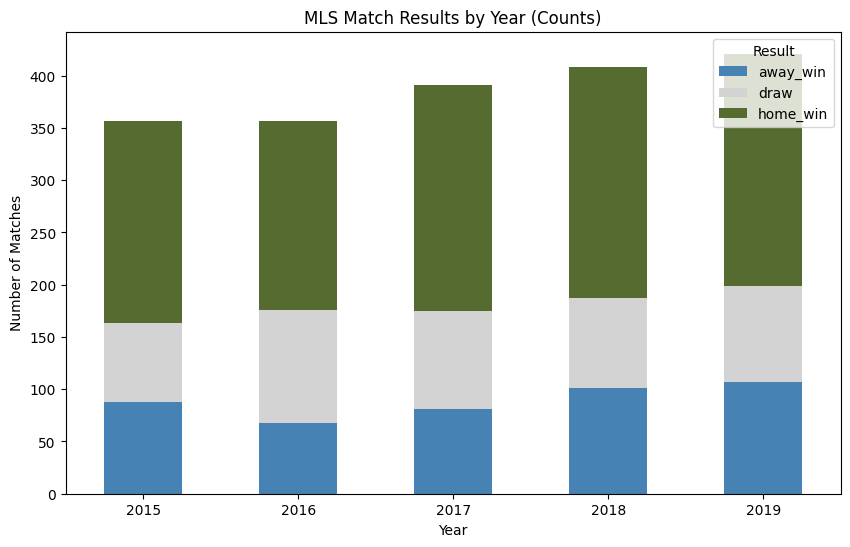

In [24]:
#That is pretty consistent, but lets see if we can make that into a nicer visual

df_viz = year_summary.reset_index()  # df_matches is your MultiIndex DataFrame
df_viz.head()


# Pivot for plotting
plot_df = df_viz.pivot(index='year', columns='result', values='Count')

# Plot
plot_df.plot(kind='bar', stacked=True, figsize=(10,6), color=['steelblue','lightgray','darkolivegreen'])
plt.title('MLS Match Results by Year (Counts)')
plt.ylabel('Number of Matches')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Result')
plt.show()


Visualization Results


*   It appears that results stay pretty consistent each season with the home team maintaining an advantage
*   However, there is an increase in matches played each year, so visualizing the percentages should be more helpful



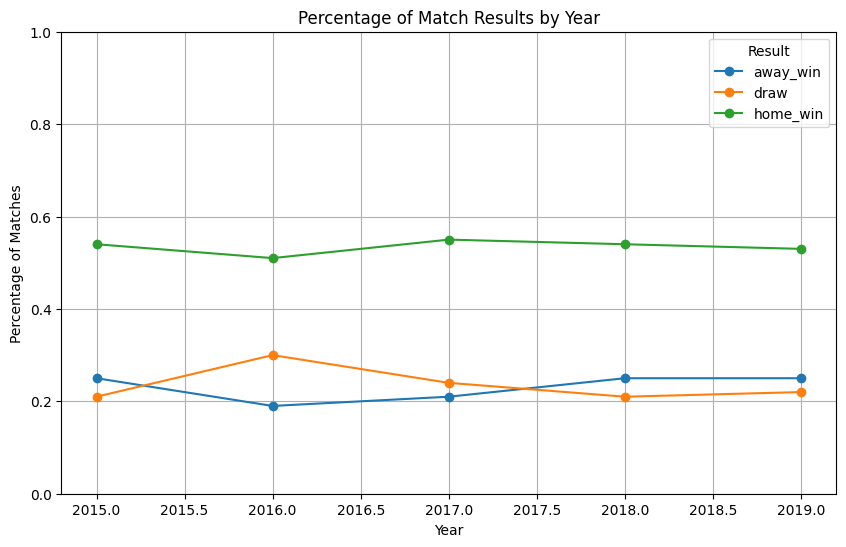

In [25]:
#Creating a visualization for the percentage of match results each year
plot_pct = df_viz.pivot(index='year', columns='result', values='Percentage')

plot_pct.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Percentage of Match Results by Year')
plt.ylabel('Percentage of Matches')
plt.xlabel('Year')
plt.ylim(0,1)
plt.grid(True)
plt.legend(title='Result')
plt.show()

In [36]:
plot_pct

result,away_win,draw,home_win
year,,,
2015,0.25,0.21,0.54
2016,0.19,0.30,0.51
2017,0.21,0.24,0.55
2018,0.25,0.21,0.54
2019,0.25,0.22,0.53


###Discussion:
As expected, the results stay relatively consistent from year to year. Home teams have an obvious home field advantage. Maybe there are some other questions we can explore. Which teams had the largest home field advantage? Well, that would likely just be the best teams! Lets see instead what teams had the biggest difference in performance home versus away. If we compare that maybe we can even find the affect of playing at home for each season!

In [26]:
from google.colab import files

# Save CSV to Colab root temporarily
df_matches_filtered.to_csv('matches_filtered_2015_2019.csv', index=False)

# Download to your computer
files.download('matches_filtered_2015_2019.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Simple Linear Regression

In [27]:
#The next step that I think I want to take is doing a simple linear regression to see the impact of playing at home on points awarded in a match
#In MLS a team is awarded 3 points for a win, 1 for a draw, and 0 for a loss

#Making a copy of the filtered dataframe
home_df = df_matches_filtered.copy()

#Creating variables for a new simpler dataframe for our regression
home_df['team'] = home_df['home']
home_df['goals_for'] = home_df['home_score']
home_df['goals_against'] = home_df['away_score']
home_df['is_home'] = 1

#Filtering down just to the variables I will need for the analysis
columns_to_keep = ['id', 'year', 'team', 'goals_for', 'goals_against', 'is_home']

home_df = home_df[columns_to_keep]

home_df

,id,year,team,goals_for,goals_against,is_home
4278,410877.0,2015,LA Galaxy,2,0,1
4279,410873.0,2015,DC United,1,0,1
4280,410871.0,2015,Philadelphia Union,0,0,1
4281,410876.0,2015,Vancouver Whitecaps,1,3,1
4282,410875.0,2015,FC Dallas,1,0,1
...,...,...,...,...,...,...
6207,558277.0,2019,Atlanta United FC,2,0,1
6208,557512.0,2019,LAFC,5,3,1
6209,558276.0,2019,LAFC,1,3,1
6210,558275.0,2019,Atlanta United FC,1,2,1


In [28]:
#Now we are going to repeat the exact same steps for the away teams

#Making a copy of the filtered dataframe
away_df = df_matches_filtered.copy()

#Creating variables for a new simpler dataframe for our regression
away_df['team'] = away_df['away']
away_df['goals_for'] = away_df['away_score']
away_df['goals_against'] = away_df['home_score']
away_df['is_home'] = 0

#Filtering down just to the variables I will need for the analysis
columns_to_keep = ['id', 'year', 'team', 'goals_for', 'goals_against', 'is_home']

away_df = away_df[columns_to_keep]

away_df

,id,year,team,goals_for,goals_against,is_home
4278,410877.0,2015,Chicago Fire FC,0,2,0
4279,410873.0,2015,Montreal Impact,0,1,0
4280,410871.0,2015,Colorado Rapids,0,0,0
4281,410876.0,2015,Toronto FC,3,1,0
4282,410875.0,2015,San Jose Earthquakes,0,1,0
...,...,...,...,...,...,...
6207,558277.0,2019,Philadelphia Union,0,2,0
6208,557512.0,2019,LA Galaxy,3,5,0
6209,558276.0,2019,Seattle Sounders FC,3,1,0
6210,558275.0,2019,Toronto FC,2,1,0


Now we have unique rows for each team in each matchup. One for home the home team and one for the away team!

In [29]:
#Lets combine these dataframes so we can do our regression
team_matches = pd.concat([home_df, away_df], ignore_index=True)

team_matches

,id,year,team,goals_for,goals_against,is_home
0,410877.0,2015,LA Galaxy,2,0,1
1,410873.0,2015,DC United,1,0,1
2,410871.0,2015,Philadelphia Union,0,0,1
3,410876.0,2015,Vancouver Whitecaps,1,3,1
4,410875.0,2015,FC Dallas,1,0,1
...,...,...,...,...,...,...
3863,558277.0,2019,Philadelphia Union,0,2,0
3864,557512.0,2019,LA Galaxy,3,5,0
3865,558276.0,2019,Seattle Sounders FC,3,1,0
3866,558275.0,2019,Toronto FC,2,1,0


In [30]:
#Since I am looking at the effect on points awarded we need to create a points column!

#Here is a simple function that awards points based on the results of the match
def assign_points(row):
  if row['goals_for'] > row['goals_against']:
    return 3
  elif row['goals_for'] == row['goals_against']:
    return 1
  else:
    return 0

#Let us apply the function to a new column and make sure that our results make sense
team_matches['points'] = team_matches.apply(assign_points, axis=1)

team_matches


,id,year,team,goals_for,goals_against,is_home,points
0,410877.0,2015,LA Galaxy,2,0,1,3
1,410873.0,2015,DC United,1,0,1,3
2,410871.0,2015,Philadelphia Union,0,0,1,1
3,410876.0,2015,Vancouver Whitecaps,1,3,1,0
4,410875.0,2015,FC Dallas,1,0,1,3
...,...,...,...,...,...,...,...
3863,558277.0,2019,Philadelphia Union,0,2,0,0
3864,557512.0,2019,LA Galaxy,3,5,0,0
3865,558276.0,2019,Seattle Sounders FC,3,1,0,3
3866,558275.0,2019,Toronto FC,2,1,0,3


In [31]:
#Now we can finally get to a regression!
import statsmodels.formula.api as smf

formula = 'points ~ is_home'
model = smf.ols(formula=formula, data=team_matches).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     518.2
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          9.47e-108
Time:                        21:47:18   Log-Likelihood:                -6344.7
No. Observations:                3868   AIC:                         1.269e+04
Df Residuals:                    3866   BIC:                         1.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9255      0.028     32.612      0.0

##Interpreting the Regression Results Part 1:

These results suggest a clear home-field advantage in Major League Soccer!

Here are some of the key findings:


*  **Teams are predicted to earn about 0.9 more points per match when playing at home compared to playing away.** This is a meaningful difference, especially in a league where small point margins can have a big impact on standings.
*   The effect is statistically significant, with a **95% confidence interval ranging from approximately 0.84 to 0.99 points**, which gives confidence that the home advantage is real and not just driven by random variation in the data.
*   While the model is intentionally simple, **the R-squared value of 0.118 indicates that playing at home alone explains about 12% of the variation in points earned**. Given how many other factors influence match results (team quality, injuries, tactics, etc.), this suggests home venue plays a meaningful role in match outcomes.

Overall, this analysis shows that playing at home provides a real competitive advantage in MLS, increasing the number of points teams can expect to earn over the course of a season.





In [32]:
#Maybe we can spruce this up even further though
#Those results were from 2015-2019, maybe we can see the home-field advantage each season
#Then, lastly, we can see each teams home field advantage in each season

model_season_interaction = smf.ols(
    formula='points ~ is_home * C(year)',
    data=team_matches
).fit()

print(model_season_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     57.98
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          8.66e-100
Time:                        21:47:18   Log-Likelihood:                -6342.6
No. Observations:                3868   AIC:                         1.271e+04
Df Residuals:                    3858   BIC:                         1.277e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Interpreting the Regression Results Part 2:

This model extends the earlier analysis by allowing the **home-field advantage to vary by season**.

* **Baseline effect (`is_home`)**  
  The `is_home` coefficient represents the **home-field advantage in the baseline season (2015)**.

* **Season interactions (`is_home × year`)**  
  The interaction terms measure **how the home-field advantage in each season differs from 2015**.

To estimate the home-field advantage for a given year, we add the baseline coefficient to that year’s interaction term.


### Estimated Home-Field Advantage by Season  
*(Points earned per match when playing at home)*

* **2015:** 0.89  
* **2016:** 0.95  
* **2017:** 1.04  
* **2018:** 0.88  
* **2019:** 0.82  


### Key Takeaways

* Teams earn **close to one additional point per match when playing at home** across all seasons, confirming a strong league-wide home-field advantage in MLS.
* None of the season-specific interaction terms are statistically significant, suggesting **limited evidence that the size of the home-field advantage changes meaningfully from year to year**.
* This result provides important context for the next analysis step, where **team-level home-field advantages** are estimated and greater variability is expected.

### Why This Matters

While match outcomes depend on many factors (team quality, injuries, tactics), this analysis shows that **venue alone plays a meaningful role in points earned**, and that effect is **remarkably consistent across seasons**.


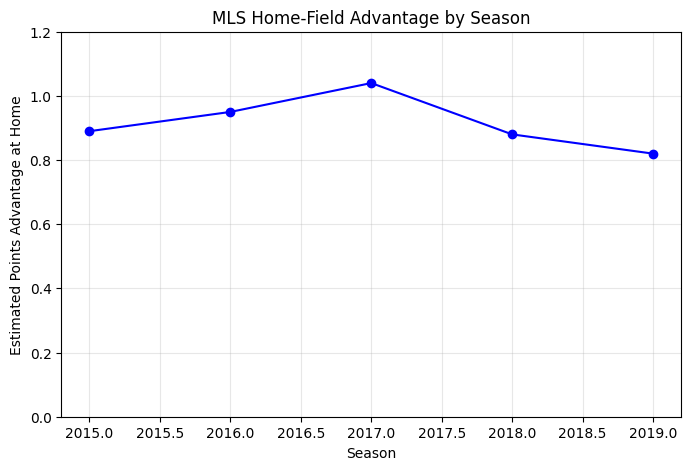

In [33]:
import matplotlib.pyplot as plt

#Just a simple plot highlighting the regression results!

years = [2015, 2016, 2017, 2018, 2019]
home_advantage = [0.89, 0.95, 1.04, 0.88, 0.82]

plt.figure(figsize=(8,5))
plt.plot(years, home_advantage, marker='o', color='blue')
plt.title('MLS Home-Field Advantage by Season')
plt.xlabel('Season')
plt.ylabel('Estimated Points Advantage at Home')
plt.ylim(0, 1.2)
plt.grid(alpha=0.3)
plt.show()


In [34]:
#Alright now lets do it for each team. I think we are just going to do it overall, instead of over each season.
#I want to see if we can get some statistically significant results!

model_team_interaction = smf.ols(
    formula='points ~ is_home * C(team)',
    data=team_matches
).fit()

print(model_team_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     13.90
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           2.71e-98
Time:                        21:47:18   Log-Likelihood:                -6282.6
No. Observations:                3868   AIC:                         1.266e+04
Df Residuals:                    3820   BIC:                         1.296e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

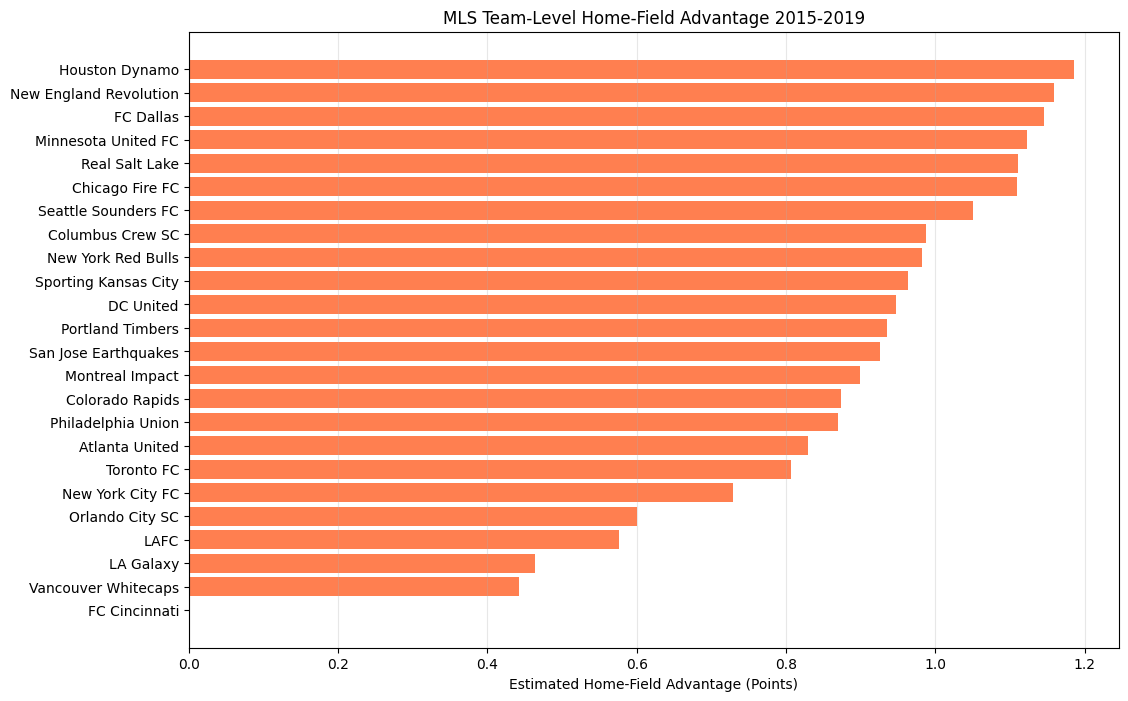

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

#This is just a simple visualization that shows what the regression model estimated to be the home field advantage for each club from 2015-2019


data = {
    'team': [
        'Atlanta United', 'Chicago Fire FC', 'Colorado Rapids', 'Columbus Crew SC',
        'DC United', 'FC Cincinnati', 'FC Dallas', 'Houston Dynamo', 'LA Galaxy',
        'LAFC', 'Minnesota United FC', 'Montreal Impact', 'New England Revolution',
        'New York City FC', 'New York Red Bulls', 'Orlando City SC', 'Philadelphia Union',
        'Portland Timbers', 'Real Salt Lake', 'San Jose Earthquakes', 'Seattle Sounders FC',
        'Sporting Kansas City', 'Toronto FC', 'Vancouver Whitecaps'
    ],
    'home_effect': [
        0.8295, 0.8295+0.2803, 0.8295+0.044, 0.8295+0.1579, 0.8295+0.1176, 0.8295-0.8295,
        0.8295+0.3165, 0.8295+0.3567, 0.8295-0.3661, 0.8295-0.2532, 0.8295+0.2926,
        0.8295+0.0693, 0.8295+0.3287, 0.8295-0.1000, 0.8295+0.1525, 0.8295-0.2295,
        0.8295+0.0399, 0.8295+0.1056, 0.8295+0.2813, 0.8295+0.0962, 0.8295+0.2203,
        0.8295+0.1344, 0.8295-0.0231, 0.8295-0.3874
    ]
}

df_plot = pd.DataFrame(data)

df_plot = df_plot.sort_values('home_effect')

# Plot
plt.figure(figsize=(12,8))
plt.barh(df_plot['team'], df_plot['home_effect'], color='coral')
plt.xlabel('Estimated Home-Field Advantage (Points)')
plt.title('MLS Team-Level Home-Field Advantage 2015-2019')
plt.grid(axis='x', alpha=0.3)
plt.show()


## Team-Level Home-Field Advantage in MLS

We extended our regression to estimate **home-field advantage for each team**, with **Atlanta United as the baseline**. The `is_home` coefficient represents the home advantage for Atlanta, and the interaction terms (`is_home:C(team)`) show how other teams differ from Atlanta.

To calculate each team’s estimated home-field advantage (in points per match), we **add the baseline `is_home` coefficient (0.83) to the team’s interaction coefficient**.

### Estimated Home-Field Advantage by Team

* **Atlanta United:** 0.83  
* **LAFC:** 0.83 + (-0.2532) ≈ 0.58  
* **Chicago Fire FC:** 0.83 + 0.2803 ≈ 1.11  
* **Colorado Rapids:** 0.83 + 0.044 ≈ 0.87  
* **Columbus Crew SC:** 0.83 + 0.1579 ≈ 0.99  
* **DC United:** 0.83 + 0.1176 ≈ 0.95  
* **FC Cincinnati:** 0.83 + (-0.8295) ≈ 0.00  
* **FC Dallas:** 0.83 + 0.3165 ≈ 1.15  
* **Houston Dynamo:** 0.83 + 0.3567 ≈ 1.19  
* **LA Galaxy:** 0.83 + (-0.0822) ≈ 0.75  
* **Minnesota United FC:** 0.83 + 0.2926 ≈ 1.12  
* **Montreal Impact:** 0.83 + 0.0693 ≈ 0.90  
* **New England Revolution:** 0.83 + 0.3287 ≈ 1.16  
* **New York City FC:** 0.83 + (-0.1000) ≈ 0.73  
* **New York Red Bulls:** 0.83 + 0.1525 ≈ 0.98  
* **Orlando City SC:** 0.83 + (-0.2295) ≈ 0.60  
* **Philadelphia Union:** 0.83 + 0.0399 ≈ 0.87  
* **Portland Timbers:** 0.83 + 0.1056 ≈ 0.94  
* **Real Salt Lake:** 0.83 + 0.2813 ≈ 1.11  
* **San Jose Earthquakes:** 0.83 + 0.0962 ≈ 0.93  
* **Seattle Sounders FC:** 0.83 + 0.2203 ≈ 1.05  
* **Sporting Kansas City:** 0.83 + 0.1344 ≈ 0.96  
* **Toronto FC:** 0.83 + (-0.0231) ≈ 0.81  
* **Vancouver Whitecaps:** 0.83 + (-0.3874) ≈ 0.44  


### Key Takeaways

* Home-field advantage varies **quite a bit across teams**, from virtually 0 points (FC Cincinnati) to over 1.15 points (FC Dallas, New England Revolution).  
* Atlanta United’s baseline advantage (0.83 points) is **close to the league average**.  
* These estimates give a clear, team-specific view of how playing at home impacts points earned over a season, which can inform **strategy, scheduling, and fan engagement analyses**.  
* Keep in mind that confidence intervals vary; some estimates may not be statistically significant on their own.


## **Conclusions**

The main takeaway is that there is a clear home-field advantage in MLS. While our last two regressions didn’t produce statistically significant results for every season or team, we consistently observed a general advantage for home teams across the five seasons analyzed. Even though the year- and team-level estimates are somewhat noisy, they still provide useful hints about real trends and shouldn’t be dismissed entirely.

###**My Thoughts**

This project was designed to showcase my ability to use Python and basic statistical techniques to extract insights from large datasets, as well as to create meaningful visualizations. I consider this a solid baseline project, as it demonstrates core skills that my later projects build upon, incorporating more advanced methods and exploring more complex questions.

#### **P.S.**

I also replicated this analysis in R to highlight my proficiency in that language, showing that I can work seamlessly across multiple tools in analytics.
